# Опыт Франка - Герца

## Часть 1.
В первой части представлена визуализация качественной зависимости, полученной в ходе эксперимена.
Количественные расчеты и получения конечного резултата см. в части 2.


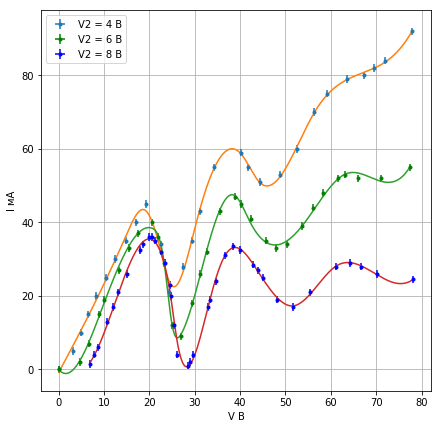

In [11]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
from scipy import *
from math import* 
import warnings
warnings.filterwarnings('ignore')

# Парсинг данных
data = pd.read_table('measurements.txt', sep = '\s+' )
data2 = pd.read_table('measurements2.txt', sep = '\s+' )
data3 = pd.read_table('measurements3.txt', sep = '\s+' )

Ik1 = data['Ik1']
errIk1 = [1]*28

Ik2 = data2['Ik2']
errIk2 = [1]*31

Ik3 = data3['Ik3']
errIk3 = [1]*38

V1_4 = data['v1_4']
errv4 = [0.05]*28

V1_6 = data2['v1_6']
errv6 = [0.05]*31

V1_8 = data3['v1_8']
errv8 = [0.05]*38

xlist1 = mlab.frange(V1_4[0],V1_4[27],0.005)
tck1 = interpolate.splrep(V1_4, Ik1, s=30, k = 3 ) 
yder1 = interpolate.splev(xlist1, tck1, der=0) 

xlist2 = mlab.frange(V1_6[0],V1_6[30],0.005)
tck2 = interpolate.splrep(V1_6, Ik2, s=15, k = 3 ) 
yder2 = interpolate.splev(xlist2, tck2, der=0)

xlist3 = mlab.frange(V1_8[0],V1_8[37],0.005)
tck3 = interpolate.splrep(V1_8, Ik3, s=30, k = 3 ) 
yder3 = interpolate.splev(xlist3, tck3, der=0)
#Часть 1
'''
Расстояния между максимумами и между минимумами при макс ускоряющем напряжении
запирающее 4 В расстояние min-min 19 В max-max 16.5 В
запирающее 6 В расстояние min-min 19.5 В max-max 16.5 В
запирающее 8 В расстояние min-min 19 В max-max 16 В
'''

#Часть 2

#Визуализация.
plt.figure(figsize= (7,7)) 

plt.errorbar(V1_4, Ik1, yerr = errIk1, xerr = errv4, fmt='.', label='V2 = 4 B') 
plt.plot(xlist1,yder1)

plt.errorbar(V1_6, Ik2, yerr = errIk2, xerr = errv6, fmt='.', label='V2 = 6 B', color = 'green')  
plt.plot(xlist2,yder2)

plt.errorbar(V1_8, Ik3, yerr = errIk3, xerr = errv8, fmt='.', label='V2 = 8 B', color = 'blue')
plt.plot(xlist3,yder3)

plt.xlabel("V B")
plt.ylabel("I мA")
plt.grid()
plt.legend();



# Часть 2
## V2 = 4 В

     fun: -43.4959483235235
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 18.561762621928644
     fun: -60.03418535461729
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 38.22376580025977


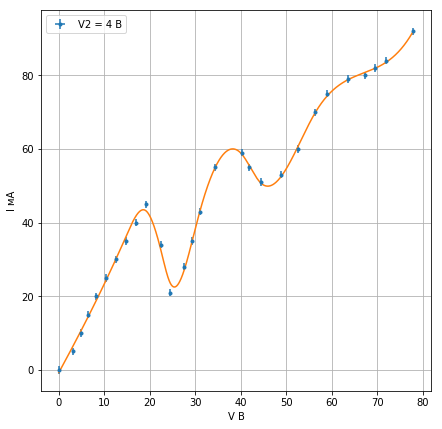

In [19]:
def f2(x):
    return interpolate.splev(x, tck2, der=0)  

solution1_1 = optimize.minimize_scalar(lambda x: -f1(x), bounds = [15,20], method = 'bounded')
solution1_2 = optimize.minimize_scalar(lambda x: -f1(x), bounds = [35,40], method = 'bounded')

print(solution1_1)
print(solution1_2)

plt.figure(figsize= (7,7)) 
plt.errorbar(V1_4, Ik1, yerr = errIk1, xerr = errv4, fmt='.', label='V2 = 4 B') 
plt.plot(xlist1,yder1)
plt.xlabel("V B")
plt.ylabel("I мA")
plt.grid()
plt.legend();


## V2 = 6 В

     fun: -38.590402994181865
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 19.841058062658263
     fun: -47.53295596435988
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 38.210973683180754


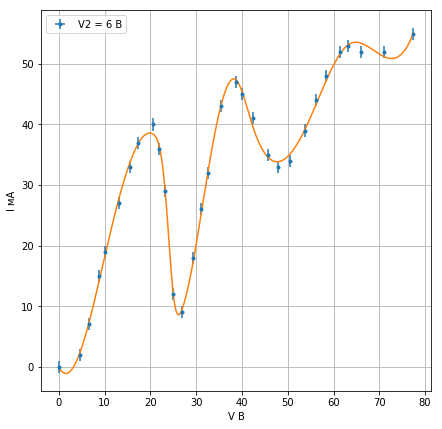

In [17]:
def f2(x):
    return interpolate.splev(x, tck2, der=0) 

solution2_1 = optimize.minimize_scalar(lambda x: -f2(x), bounds = [15,20], method = 'bounded')
solution2_2 = optimize.minimize_scalar(lambda x: -f2(x), bounds = [35,40], method = 'bounded')

print(solution2_1)
print(solution2_2)

plt.figure(figsize= (7,7)) 
plt.errorbar(V1_6, Ik2, yerr = errIk2, xerr = errv6, fmt='.', label='V2 = 6 B') 
plt.plot(xlist2,yder2)
plt.xlabel("V B")
plt.ylabel("I мA")
plt.grid()
plt.legend();

## V2 = 8 B


     fun: -35.4958380932096
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 19.904301269543666
     fun: -33.17972575629938
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 38.865930254184384


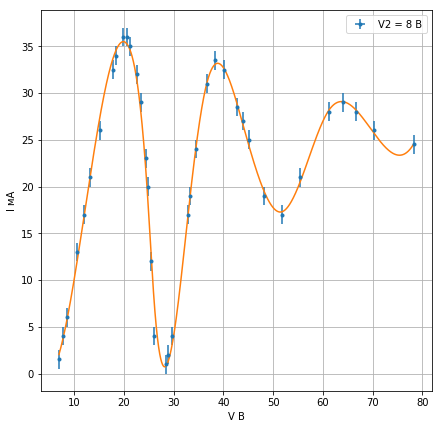

In [18]:
def f3(x):
    return interpolate.splev(x, tck3, der=0) 

solution3_1 = optimize.minimize_scalar(lambda x: -f3(x), bounds = [15,20], method = 'bounded')
solution3_2 = optimize.minimize_scalar(lambda x: -f3(x), bounds = [35,40], method = 'bounded')

print(solution3_1)
print(solution3_2)

plt.figure(figsize= (7,7)) 
plt.errorbar(V1_8, Ik3, yerr = errIk3, xerr = errv8, fmt='.', label='V2 = 8 B') 
plt.plot(xlist3,yder3)
plt.xlabel("V B")
plt.ylabel("I мA")
plt.grid()
plt.legend();

## Подведем итоги.
Значения энергии активации, полученные при разных $V_2$ в 4, 6 и 8 B, равны соответственно:
 19 $\pm$ 1 эВ, 19 $\pm$ 1 эВ, 19 $\pm$ 1 эВ.
 
